In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.max_rows = 10

In [ ]:
data = pd.read_csv("/content/titanic.csv")

In [ ]:
len(data)

891

In [ ]:
len(data.columns)

12

In [ ]:
list(data)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
pd.isnull(data).sum().sum()

866

In [ ]:
data.mean()


<ipython-input-13-abc01cf6c622>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [ ]:
data.max()

<ipython-input-14-8637789457d2>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.max()


PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [ ]:
s=data['Age'].mean()
data['Age'].fillna(s, inplace=True)

In [ ]:
s1=data['Cabin'].mode()
data['Cabin'].fillna(s1, inplace=True)

In [ ]:
s2=data['Embarked'].mode()
data['Embarked'].fillna(s2, inplace=True)

In [ ]:
pd.isnull(data).sum().sum()

687

0    549
1    342
Name: Survived, dtype: int64


<Axes: >

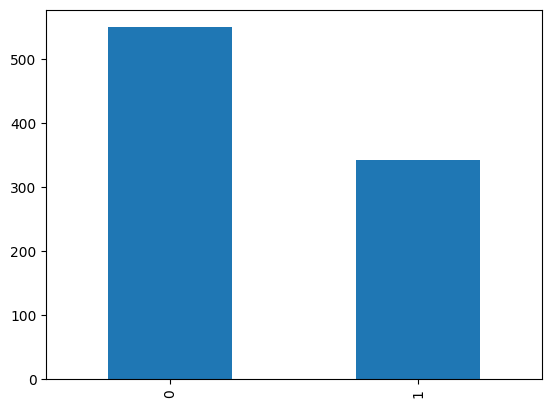

In [ ]:
s=data['Survived'].value_counts()
print(s)
s.plot(kind='bar')

0    549
1    342
Name: Survived, dtype: int64


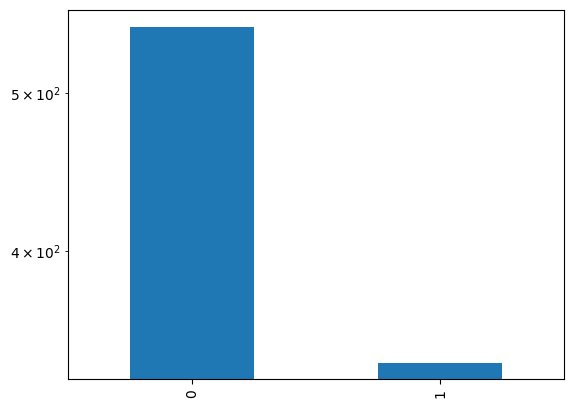

In [ ]:
s=data['Survived'].value_counts()
print(s)
s.plot(kind='bar')
plt.yscale('log')

<Axes: ylabel='Frequency'>

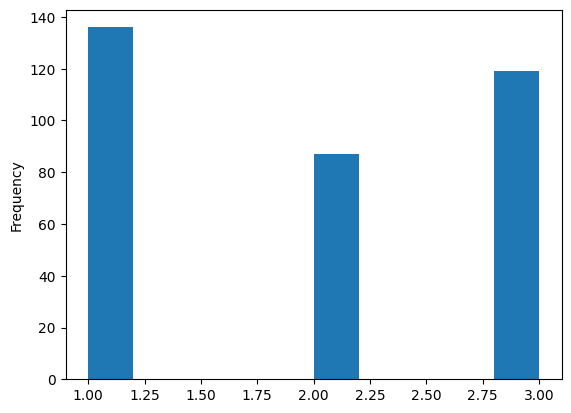

In [ ]:
d1=data[data['Survived']==1]
d2=data[data['Survived']==0]
d1['Pclass'].plot(kind='hist')

<Axes: ylabel='Frequency'>

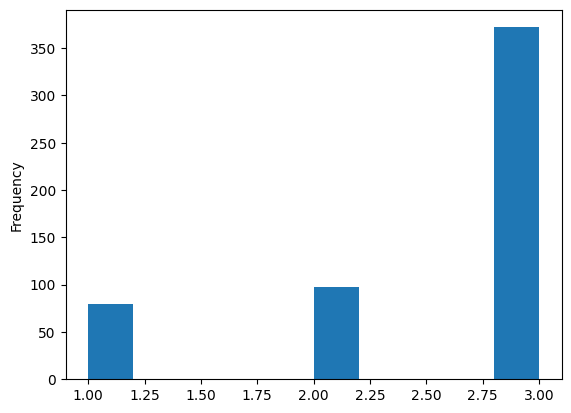

In [ ]:
d2['Pclass'].plot(kind='hist')

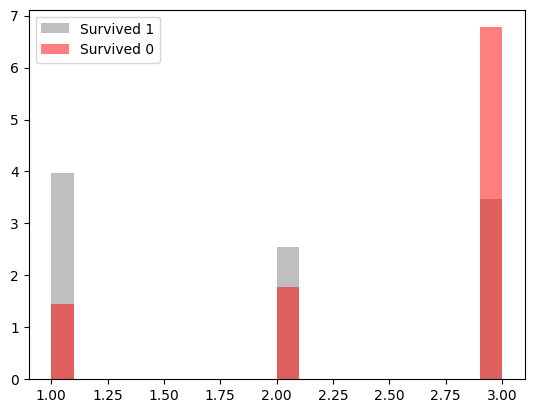

In [ ]:
a=data[data['Survived']==1]
d=data[data['Survived']==0]
plt.hist(a.Pclass,bins=20,density =True,alpha=0.5,color='gray',label='Survived 1')
plt.hist(d.Pclass,bins=20,density =True,alpha=0.5,color='red',label='Survived 0')
plt.legend()

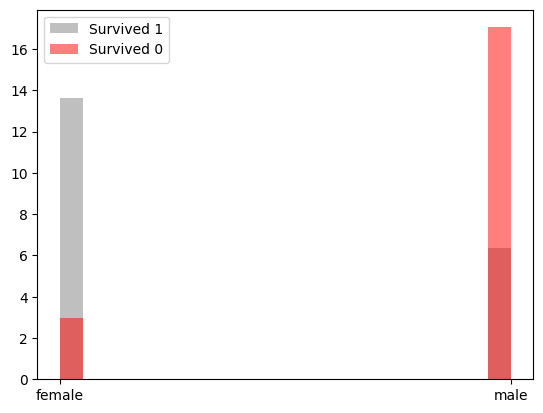

In [ ]:
a=data[data['Survived']==1]
d=data[data['Survived']==0]
plt.hist(a.Sex,bins=20,density =True,alpha=0.5,color='gray',label='Survived 1')
plt.hist(d.Sex,bins=20,density =True,alpha=0.5,color='red',label='Survived 0')
plt.legend()

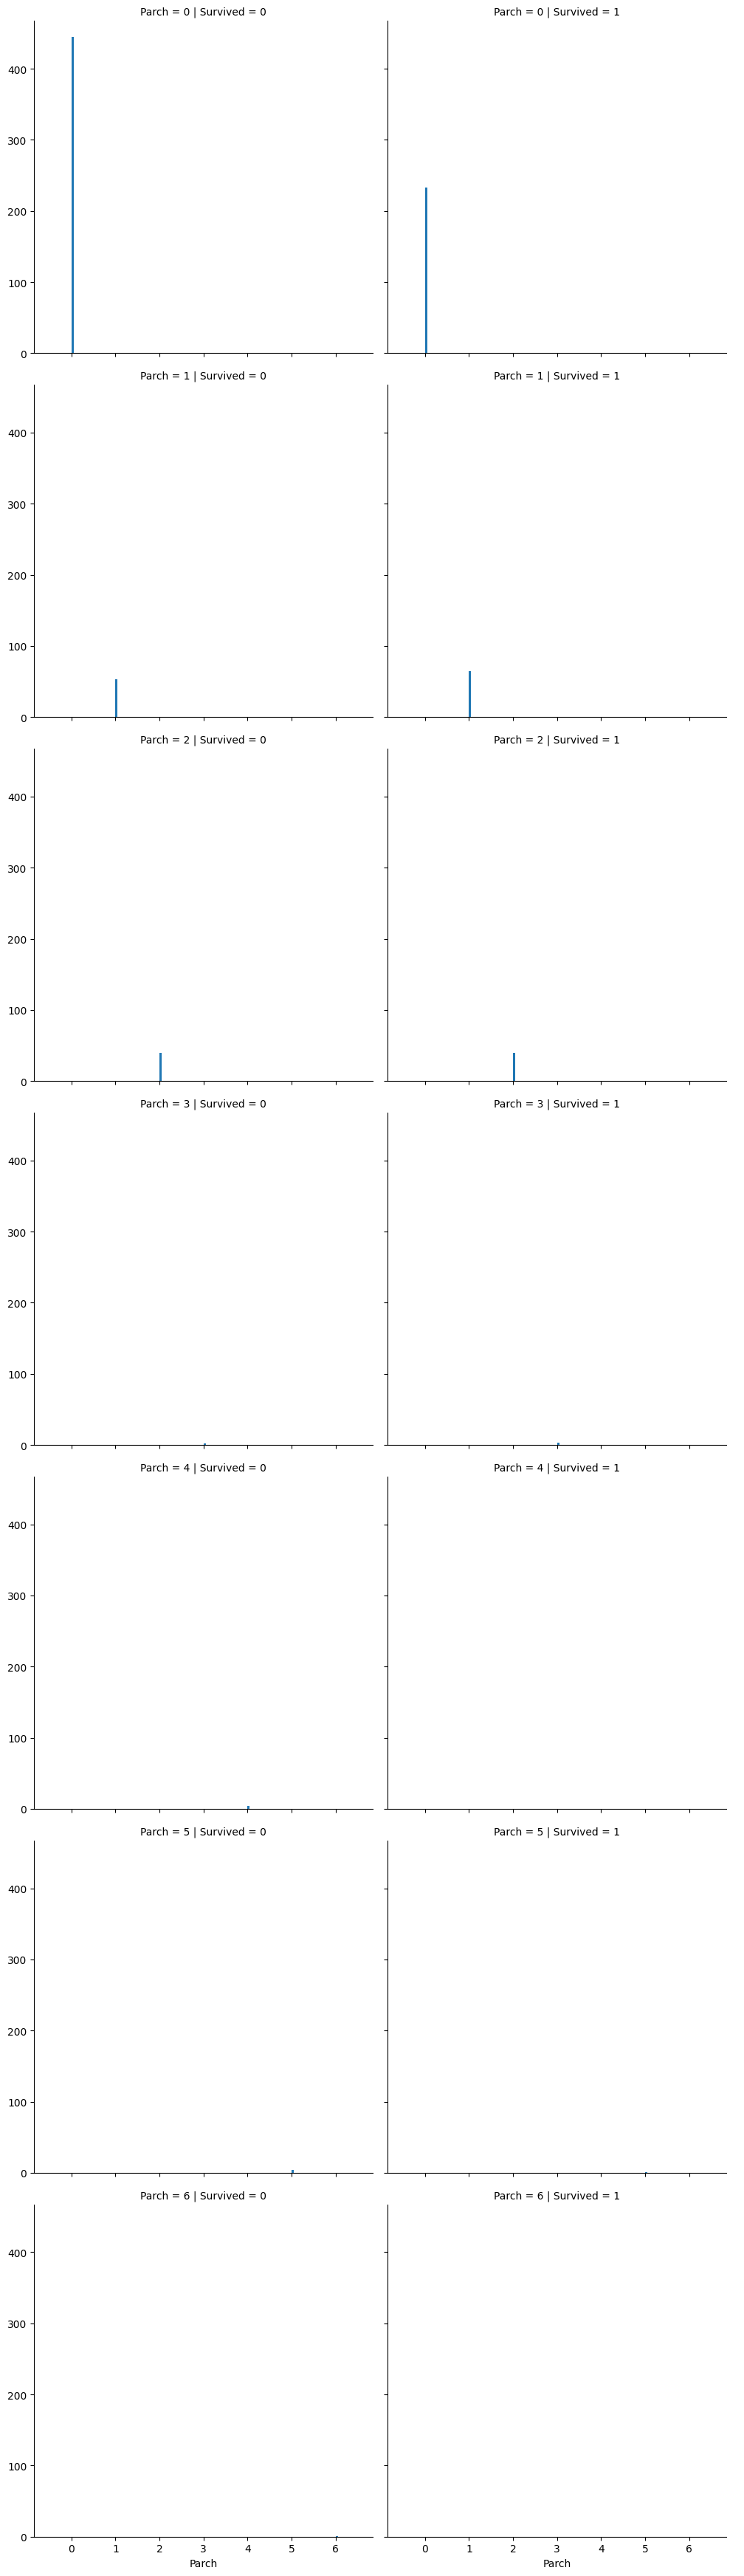

In [ ]:
grid = sns.FacetGrid(data, col ='Survived', row ='Parch', height = 5, aspect=1)
grid.map(plt.hist, 'Parch', alpha=1, bins=20)
grid.add_legend();

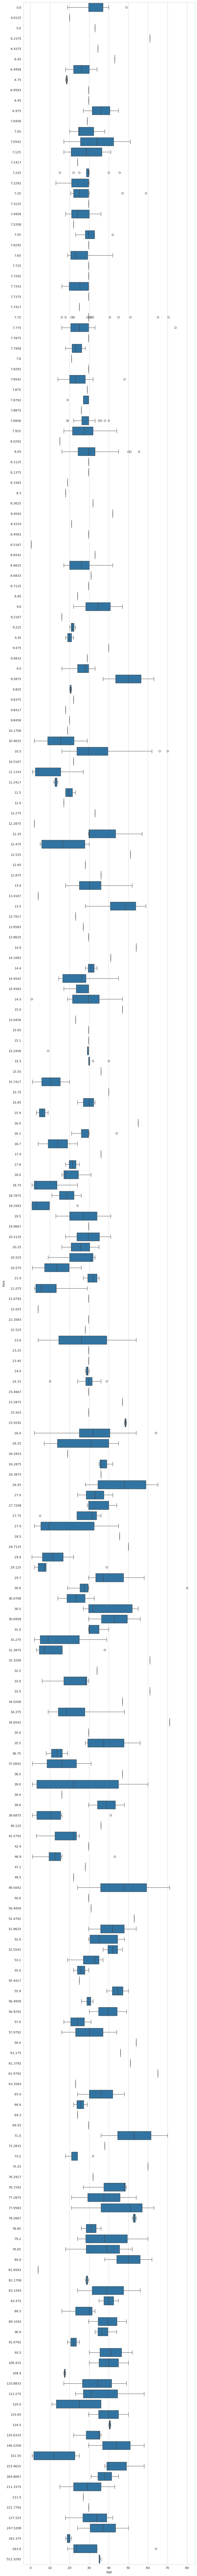

In [ ]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(10, 150))
    sns.boxplot(data=data, x='Age', y='Fare', orient='h')

<ipython-input-29-b5dfa5b3ae39>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  vals = data.groupby(pd.cut(data['Age'], bins=len(labels))).mean()


([<matplotlib.patches.Wedge at 0x793c5a6f37c0>,
 [Text(0.8913752703841848, 0.6445542082304027, '0-9'),
  Text(-0.09312288666567377, 1.09605115208144, '10-19'),
  Text(-0.8194936641790819, 0.7337779871121388, '20-29'),
  Text(-1.095403076966253, -0.10045943944132402, '30-39'),
  Text(-0.6259564126546358, -0.9045322379310422, '40-49'),
  Text(0.24653297258398313, -1.0720174874641295, '50-59'),
  Text(0.8622945436619225, -0.6829700725294463, '60-69'),
  Text(1.075630853714267, -0.2302569576319418, '70-80')])

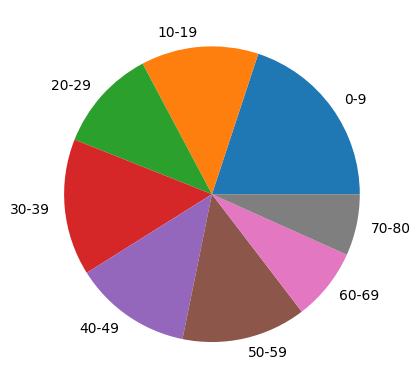

In [ ]:
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-80"]

vals = data.groupby(pd.cut(data['Age'], bins=len(labels))).mean()

fig, ax = plt.subplots()
ax.pie(vals.Survived, labels=labels)

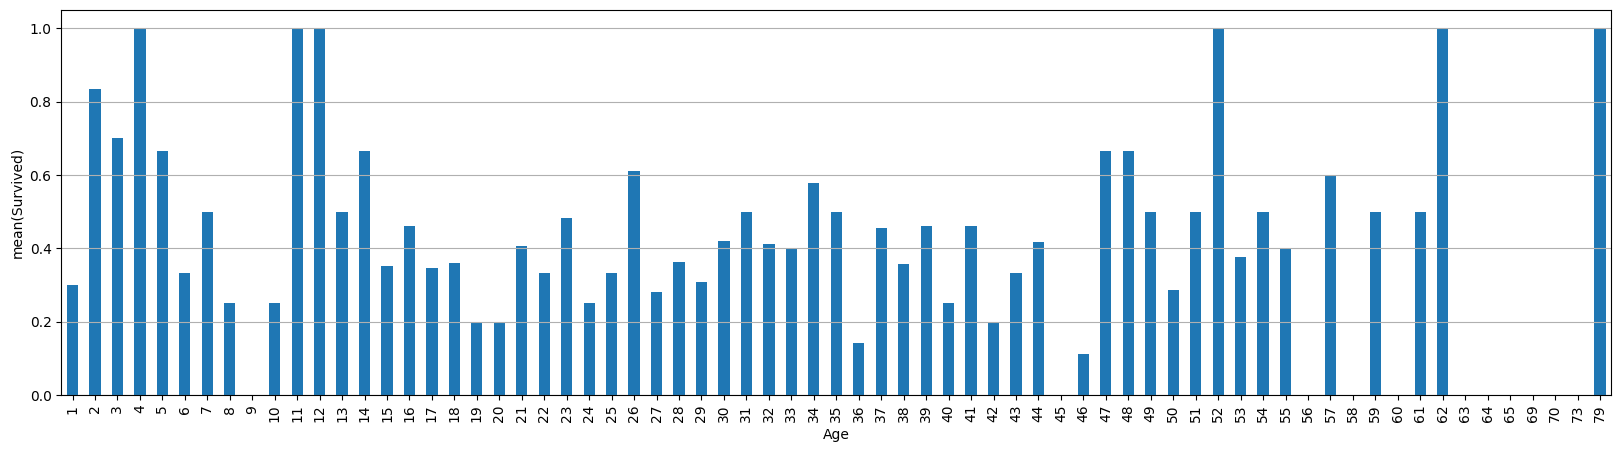

In [ ]:

b_dict=dict()
for i in range (1,100):
    b_dict[i]=data[(data["Age"] > i)&(data["Age"] <= i+1)].Survived.mean()

plt.figure(figsize=(20, 5))
b=pd.Series(b_dict).dropna()
ax=b.plot(kind="bar",xlabel="Age",ylabel="mean(Survived)")
ax.grid(axis='y')


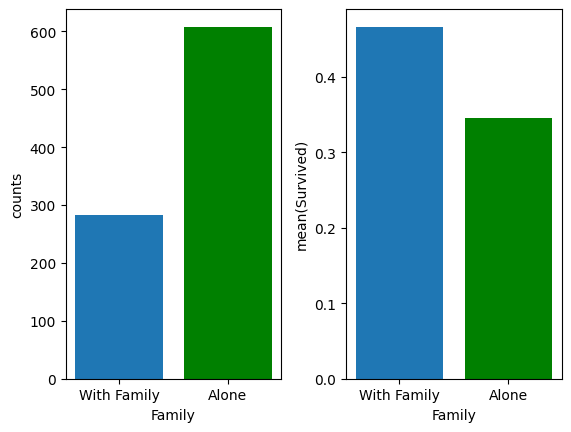

In [ ]:
with_family=data[data['SibSp'] != 0]
alone=data[data['SibSp'] == 0]
xlabels=["With Family", "Alone"]
y1=[with_family.count(),alone.count()]
y2=[with_family.Survived.mean(),alone.Survived.mean()]
fig, (ax, ax1) = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.3)
ax.bar(xlabels[0],y1[0])
ax.bar(xlabels[1],y1[1], color='g')
ax.set_ylabel("counts")
ax.set_xlabel("Family")
ax1.bar(xlabels[0],y2[0])
ax1.bar(xlabels[1],y2[1], color='g')
ax1.set_ylabel("mean(Survived)")
ax1.set_xlabel("Family")
plt.show()